In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

my_data = pd.read_csv("sales.csv", delimiter=",")
my_data[0:5]

In [2]:
my_data.shape

(640840, 10)

In [ ]:
my_data.head()


In [ ]:
my_data.isnull().sum() # check for missing values


In [ ]:
my_data.drop(columns=["Unnamed: 0"], inplace=True) #dropping the unnamed column. 


In [18]:
#Converting date.

my_data["date"] = pd.to_datetime(my_data["date"])
my_data["date_int"] = my_data["date"].astype("int64")


In [32]:
my_data["date"] = pd.to_datetime(my_data["date"])
my_data["date"] = pd.to_datetime(my_data["date"])

In [25]:
my_data.drop(columns=["date_int"], inplace=True) 

In [ ]:
# Converting state holiday into integer. 

my_data["state_holiday"] = my_data["state_holiday"].astype("category").cat.codes


In [ ]:
print(my_data.head())

In [ ]:
my_data.dtypes

In [ ]:
print(my_data.describe())

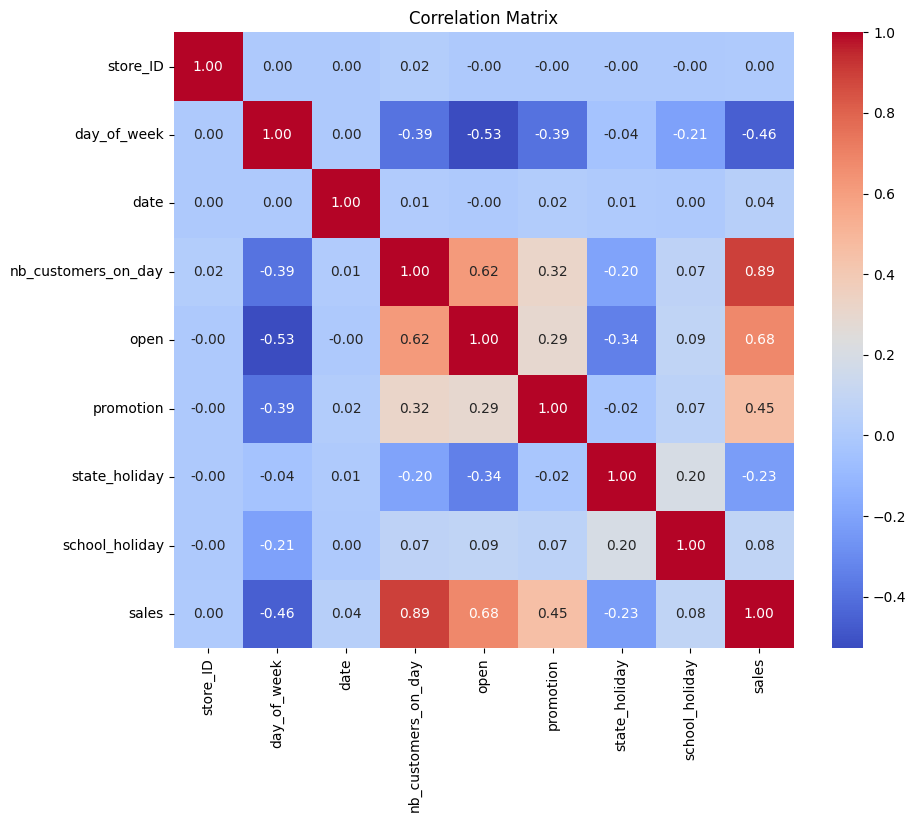

In [37]:
# Compute correlation matrix
correlation_matrix = my_data.corr()

# Display it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Impact of Promotions on Sales')

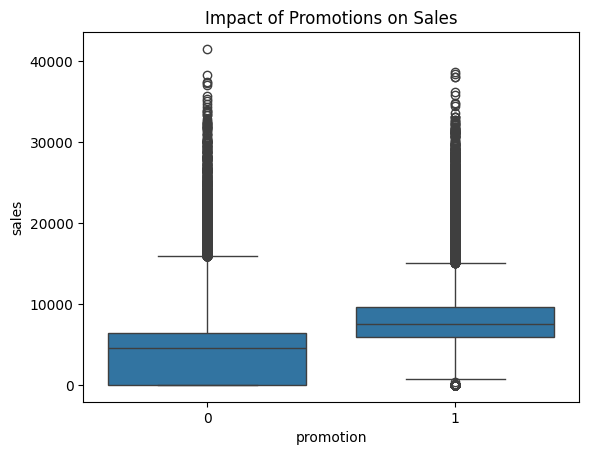

In [38]:
sns.boxplot(x="promotion", y="sales", data=my_data)
plt.title("Impact of Promotions on Sales")


In [39]:
X = my_data.drop(columns=["sales"])  # Drop target variable
y = my_data["sales"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [44]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R² Score:", r2_score(y_test, rf_preds))


Random Forest Performance:
MAE: 402.50927680683736
MSE: 486658.0681798584
R² Score: 0.9670769030989174


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
# Load your data
my_data = pd.read_csv("sales.csv", delimiter=",")
# Preprocess the data
# Drop irrelevant columns (if any)
my_data = my_data.drop(columns=['date', 'store_ID'])  # You might want to drop the 'date' and 'store_ID' for simplicity
# Convert categorical columns (e.g., state_holiday, school_holiday) to numeric using LabelEncoder
label_encoder = LabelEncoder()
my_data['state_holiday'] = label_encoder.fit_transform(my_data['state_holiday'])
my_data['school_holiday'] = label_encoder.fit_transform(my_data['school_holiday'])
# Features and Target
X = my_data.drop(columns=['sales'])  # Features
y = my_data['sales']  # Target variable
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert the data into DMatrix format (XGBoost's internal data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error (RMSE)
    'max_depth': 6,  # Maximum depth of a tree
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,  # Subsample ratio of the training data
    'colsample_bytree': 0.8,  # Subsample ratio of columns when building each tree
    'silent': 1  # Suppress output
}
# Train the model
num_round = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_round)
# Make predictions on the test set
y_pred = model.predict(dtest)
# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
# Optionally, you can save the model for future use
model.save_model("xgboost_sales_model.json")

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Make predictions on the test set
y_pred = model.predict(dtest)
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
# R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
# Plot Feature Importance
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight', max_num_features=20, height=0.8)
plt.title('Feature Importance')
plt.show()
# Visualize a Single Tree
plt.figure(figsize=(20, 16))
plot_tree(model, num_trees=0)  # Change num_trees to visualize a different tree
plt.title('Visualizing XGBoost Tree')
plt.show()